In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + np.random.normal(0., 10., size = 100)

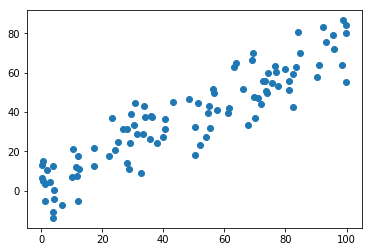

In [2]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# demean

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

In [4]:
X_demean = demean(X)

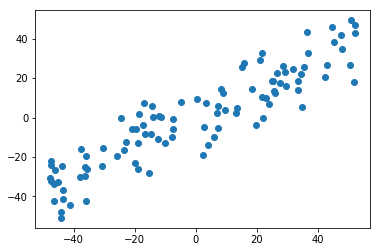

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [11]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)
def df_math(w, X):
    return 2 * (X.T.dot(X.dot(w))) / len(X)

In [12]:
def df_debug(theta, X_b, epsilon = 0.0001):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (f(theta_1, X_b) - f(theta_2, X_b)) / (2 *epsilon)
    return res

In [31]:
def direction(w):
    return w / np.linalg.norm(w)
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    for i in range(int(n_iters)):
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
    return w

In [40]:
res1 = gradient_ascent(df_math, X_demean, np.array([1,1]), 0.01)

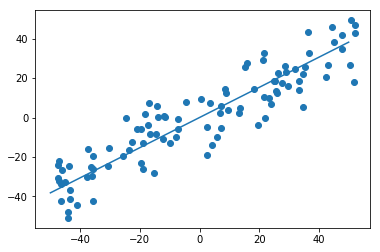

In [39]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
dec = np.linspace(-50,50,100)
dec_y = dec * (res[1]/res[0])
plt.plot(dec, dec_y)
plt.show()

In [41]:
res

array([0.79401518, 0.60789793])

In [42]:
res1

array([0.79401518, 0.60789793])

In [44]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.83990995, 0.18349056])

In [63]:
res = gradient_ascent(df_math, X_demean, initial_w, 0.01)

In [64]:
res

array([0.79401525, 0.60789784])

# 注意: 不能使用StandardScaler标准化数据

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
s = StandardScaler()
s.fit(X)
X_transform = s.transform(X)

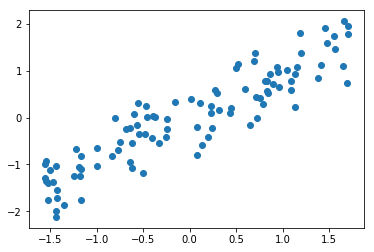

In [49]:
plt.scatter(X_transform[:, 0], X_transform[:, 1])
plt.show()

In [61]:
res = gradient_ascent(df_math, X_transform, initial_w, 0.01)

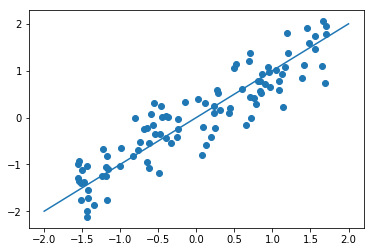

In [53]:
plt.scatter(X_transform[:, 0], X_transform[:, 1])
dec = np.linspace(-2,2,100)
dec_y = dec * (res[1]/res[0])
plt.plot(dec, dec_y)
plt.show()

In [62]:
res

array([0.7072931 , 0.70692042])

# 求前n个主成分

In [69]:
X_project = X_demean.dot(res)

In [70]:
X_ = np.array([i * res for i in X_project])

In [73]:
X2 = X - X_

In [86]:
X2 = X_demean - X_demean.dot(res).reshape(-1,1) * res

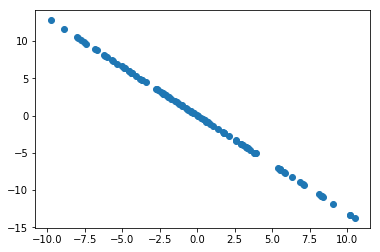

In [87]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [88]:
w2 = gradient_ascent(df_math, X2,initial_w,0.001)

In [89]:
w2

array([ 0.60791626, -0.79400115])

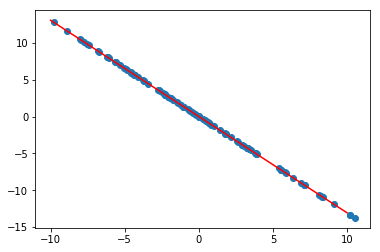

In [90]:
plt.scatter(X2[:,0],X2[:,1])
dec = np.linspace(-10,10,100)
dec_y = dec * (w2[1]/w2[0])
plt.plot(dec, dec_y,color = "r")
plt.show()

In [91]:
res.dot(w2)

2.319912339288077e-05

In [92]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)
def df(w, X):
    return 2 * (X.T.dot(X.dot(w))) / len(X)

In [93]:
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    for i in range(int(n_iters)):
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
    return w

In [97]:
def first_n_component(n, X, eta = 0.01, n_iters = 1e4, epsilon = 1e-8):
    X_pca = demean(X.copy())
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta, n_iters, epsilon)
        res.append(w)
        X_pca -= X_pca.dot(w).reshape(-1,1) * w
    return np.array(res)

In [102]:
res2 = first_n_component(1,X)

In [103]:
res2

array([[0.79401524, 0.60789785]])